In [17]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [18]:
mathData = pd.read_csv('student/student-mat.csv', sep=';')

In [19]:
mathData.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [20]:
uniMathData = mathData[['G1', 'G3']]
uniMathData.head(5)

,G1,G3
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10


In [21]:
uniMathData.to_csv('student/univariate_MathData_2.csv')

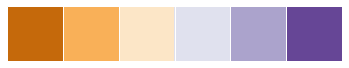

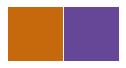

In [22]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [23]:
uniMathData.columns #columns in the dataframe

Index(['G1', 'G3'], dtype='object')

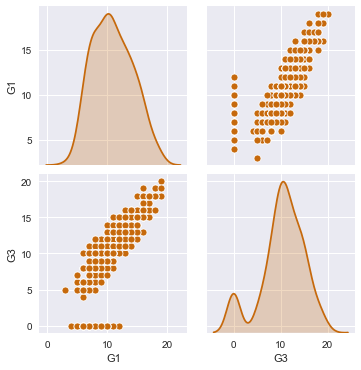

In [24]:
#pairplot for all the values

sns.pairplot(uniMathData,
             x_vars = ['G1', 'G3'],
             y_vars =  ['G1', 'G3'],
       diag_kind='kde'
             )

In [25]:
#80-20 train-test percent split

trainDataset = uniMathData.sample(frac=0.8, random_state=0) 
testDataset = uniMathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [26]:
print(trainDataset.shape)
print(testDataset.shape)

(316, 2)
(79, 2)


In [27]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [28]:
#removing the G3 column and saving it into the labels variable

trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [29]:
print(trainFeatures.head())
print(testFeatures.head())

     G1
329  14
318  11
317   9
65   16
59   15
    G1
9   14
25   6
28  11
31  17
32  17


In [30]:
# univariate -> num(features) = 1
# multvariate -> num(features) > 1 = 11


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [31]:
model.compile(
    loss = 'mean_absolute_error',
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ['mae', 'mse']
)

In [32]:
numEpochs = 1000
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/1000
10/10 [==============================] - 3s 102ms/step - loss: 28.3706 - mae: 28.3706 - mse: 895.3555 - val_loss: 30.0322 - val_mae: 30.0322 - val_mse: 1000.6392
Epoch 2/1000
10/10 [==============================] - 0s 10ms/step - loss: 28.2534 - mae: 28.2534 - mse: 888.1668 - val_loss: 29.9075 - val_mae: 29.9075 - val_mse: 992.5056
Epoch 3/1000
10/10 [==============================] - 0s 5ms/step - loss: 28.1357 - mae: 28.1357 - mse: 880.9410 - val_loss: 29.7830 - val_mae: 29.7830 - val_mse: 984.4169
Epoch 4/1000
10/10 [==============================] - 0s 5ms/step - loss: 28.0183 - mae: 28.0183 - mse: 873.7715 - val_loss: 29.6583 - val_mae: 29.6583 - val_mse: 976.3521
Epoch 5/1000
10/10 [==============================] - 0s 6ms/step - loss: 27.9005 - mae: 27.9005 - mse: 866.5663 - val_loss: 29.5339 - val_mae: 29.5339 - val_mse: 968.3350
Epoch 6/1000
10/10 [==============================] - 0s 6ms/step - loss: 27.7839 - mae: 27.7839 - mse: 859.5916 - val_loss: 29.4089 - v

10/10 [==============================] - 0s 12ms/step - loss: 22.8464 - mae: 22.8464 - mse: 586.9113 - val_loss: 24.1789 - val_mae: 24.1789 - val_mse: 654.8908
Epoch 49/1000
10/10 [==============================] - 0s 12ms/step - loss: 22.7283 - mae: 22.7283 - mse: 580.9944 - val_loss: 24.0547 - val_mae: 24.0547 - val_mse: 648.3519
Epoch 50/1000
10/10 [==============================] - 0s 9ms/step - loss: 22.6111 - mae: 22.6111 - mse: 575.2361 - val_loss: 23.9301 - val_mae: 23.9301 - val_mse: 641.8270
Epoch 51/1000
10/10 [==============================] - 0s 7ms/step - loss: 22.4938 - mae: 22.4938 - mse: 569.4696 - val_loss: 23.8053 - val_mae: 23.8053 - val_mse: 635.3206
Epoch 52/1000
10/10 [==============================] - 0s 6ms/step - loss: 22.3757 - mae: 22.3757 - mse: 563.6779 - val_loss: 23.6810 - val_mae: 23.6810 - val_mse: 628.8796
Epoch 53/1000
10/10 [==============================] - 0s 7ms/step - loss: 22.2586 - mae: 22.2586 - mse: 557.9539 - val_loss: 23.5563 - val_mae: 23

10/10 [==============================] - 0s 6ms/step - loss: 17.3211 - mae: 17.3211 - mse: 344.1136 - val_loss: 18.3260 - val_mae: 18.3260 - val_mse: 382.8383
Epoch 96/1000
10/10 [==============================] - 0s 6ms/step - loss: 17.2038 - mae: 17.2038 - mse: 339.7159 - val_loss: 18.2014 - val_mae: 18.2014 - val_mse: 377.8456
Epoch 97/1000
10/10 [==============================] - 0s 5ms/step - loss: 17.0864 - mae: 17.0864 - mse: 335.2986 - val_loss: 18.0764 - val_mae: 18.0764 - val_mse: 372.8754
Epoch 98/1000
10/10 [==============================] - 0s 6ms/step - loss: 16.9682 - mae: 16.9682 - mse: 330.8400 - val_loss: 17.9523 - val_mae: 17.9523 - val_mse: 367.9688
Epoch 99/1000
10/10 [==============================] - 0s 6ms/step - loss: 16.8504 - mae: 16.8504 - mse: 326.4755 - val_loss: 17.8283 - val_mae: 17.8283 - val_mse: 363.1020
Epoch 100/1000
10/10 [==============================] - 0s 6ms/step - loss: 16.7340 - mae: 16.7340 - mse: 322.2275 - val_loss: 17.7030 - val_mae: 17.

10/10 [==============================] - 0s 14ms/step - loss: 11.8015 - mae: 11.8015 - mse: 167.2371 - val_loss: 12.4753 - val_mae: 12.4753 - val_mse: 184.5231
Epoch 143/1000
10/10 [==============================] - 0s 7ms/step - loss: 11.6853 - mae: 11.6853 - mse: 164.1672 - val_loss: 12.3517 - val_mae: 12.3517 - val_mse: 181.1274
Epoch 144/1000
10/10 [==============================] - 0s 10ms/step - loss: 11.5700 - mae: 11.5700 - mse: 161.1806 - val_loss: 12.2279 - val_mae: 12.2279 - val_mse: 177.7589
Epoch 145/1000
10/10 [==============================] - 0s 19ms/step - loss: 11.4553 - mae: 11.4553 - mse: 158.2341 - val_loss: 12.1055 - val_mae: 12.1055 - val_mse: 174.4322
Epoch 146/1000
10/10 [==============================] - 0s 9ms/step - loss: 11.3430 - mae: 11.3430 - mse: 155.2408 - val_loss: 11.9871 - val_mae: 11.9871 - val_mse: 171.2288
Epoch 147/1000
10/10 [==============================] - 0s 8ms/step - loss: 11.2339 - mae: 11.2339 - mse: 152.4256 - val_loss: 11.8690 - val_m

Epoch 190/1000
10/10 [==============================] - 0s 8ms/step - loss: 7.2992 - mae: 7.2992 - mse: 62.0622 - val_loss: 7.6149 - val_mae: 7.6149 - val_mse: 66.7638
Epoch 191/1000
10/10 [==============================] - 0s 9ms/step - loss: 7.2098 - mae: 7.2098 - mse: 60.5118 - val_loss: 7.5144 - val_mae: 7.5144 - val_mse: 64.9608
Epoch 192/1000
10/10 [==============================] - 0s 8ms/step - loss: 7.1175 - mae: 7.1175 - mse: 58.9208 - val_loss: 7.4149 - val_mae: 7.4149 - val_mse: 63.2025
Epoch 193/1000
10/10 [==============================] - 0s 8ms/step - loss: 7.0265 - mae: 7.0265 - mse: 57.3957 - val_loss: 7.3149 - val_mae: 7.3149 - val_mse: 61.4646
Epoch 194/1000
10/10 [==============================] - 0s 11ms/step - loss: 6.9358 - mae: 6.9358 - mse: 55.8658 - val_loss: 7.2142 - val_mae: 7.2142 - val_mse: 59.7404
Epoch 195/1000
10/10 [==============================] - 0s 6ms/step - loss: 6.8450 - mae: 6.8450 - mse: 54.3810 - val_loss: 7.1131 - val_mae: 7.1131 - val_mse:

10/10 [==============================] - 0s 10ms/step - loss: 3.0327 - mae: 3.0327 - mse: 13.1770 - val_loss: 2.9197 - val_mae: 2.9197 - val_mse: 11.7849
Epoch 239/1000
10/10 [==============================] - 0s 13ms/step - loss: 2.9564 - mae: 2.9564 - mse: 12.7902 - val_loss: 2.8332 - val_mae: 2.8332 - val_mse: 11.3266
Epoch 240/1000
10/10 [==============================] - 0s 12ms/step - loss: 2.8774 - mae: 2.8774 - mse: 12.3854 - val_loss: 2.7524 - val_mae: 2.7524 - val_mse: 10.9088
Epoch 241/1000
10/10 [==============================] - 0s 12ms/step - loss: 2.8044 - mae: 2.8044 - mse: 12.0453 - val_loss: 2.6716 - val_mae: 2.6716 - val_mse: 10.5084
Epoch 242/1000
10/10 [==============================] - 0s 15ms/step - loss: 2.7326 - mae: 2.7326 - mse: 11.7108 - val_loss: 2.5937 - val_mae: 2.5937 - val_mse: 10.1410
Epoch 243/1000
10/10 [==============================] - 0s 13ms/step - loss: 2.6652 - mae: 2.6652 - mse: 11.4156 - val_loss: 2.5185 - val_mae: 2.5185 - val_mse: 9.8017
Ep

10/10 [==============================] - 0s 10ms/step - loss: 1.9536 - mae: 1.9536 - mse: 9.3465 - val_loss: 1.6699 - val_mae: 1.6699 - val_mse: 7.3878
Epoch 288/1000
10/10 [==============================] - 0s 12ms/step - loss: 1.9534 - mae: 1.9534 - mse: 9.3507 - val_loss: 1.6707 - val_mae: 1.6707 - val_mse: 7.3914
Epoch 289/1000
10/10 [==============================] - 0s 14ms/step - loss: 1.9530 - mae: 1.9530 - mse: 9.3525 - val_loss: 1.6710 - val_mae: 1.6710 - val_mse: 7.3927
Epoch 290/1000
10/10 [==============================] - 0s 14ms/step - loss: 1.9529 - mae: 1.9529 - mse: 9.3554 - val_loss: 1.6717 - val_mae: 1.6717 - val_mse: 7.3960
Epoch 291/1000
10/10 [==============================] - 0s 11ms/step - loss: 1.9527 - mae: 1.9527 - mse: 9.3589 - val_loss: 1.6722 - val_mae: 1.6722 - val_mse: 7.3982
Epoch 292/1000
10/10 [==============================] - 0s 8ms/step - loss: 1.9527 - mae: 1.9527 - mse: 9.3634 - val_loss: 1.6730 - val_mae: 1.6730 - val_mse: 7.4025
Epoch 293/1000

10/10 [==============================] - 0s 5ms/step - loss: 1.9484 - mae: 1.9484 - mse: 9.3915 - val_loss: 1.6794 - val_mae: 1.6794 - val_mse: 7.4229
Epoch 337/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.9484 - mae: 1.9484 - mse: 9.3917 - val_loss: 1.6792 - val_mae: 1.6792 - val_mse: 7.4215
Epoch 338/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.9483 - mae: 1.9483 - mse: 9.3880 - val_loss: 1.6784 - val_mae: 1.6784 - val_mse: 7.4173
Epoch 339/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.9484 - mae: 1.9484 - mse: 9.3847 - val_loss: 1.6779 - val_mae: 1.6779 - val_mse: 7.4144
Epoch 340/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.9484 - mae: 1.9484 - mse: 9.3846 - val_loss: 1.6784 - val_mae: 1.6784 - val_mse: 7.4163
Epoch 341/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.9487 - mae: 1.9487 - mse: 9.3900 - val_loss: 1.6792 - val_mae: 1.6792 - val_mse: 7.4196
Epoch 342/1000
10/1

10/10 [==============================] - 0s 13ms/step - loss: 1.9458 - mae: 1.9458 - mse: 9.3584 - val_loss: 1.6766 - val_mae: 1.6766 - val_mse: 7.3841
Epoch 386/1000
10/10 [==============================] - 0s 13ms/step - loss: 1.9457 - mae: 1.9457 - mse: 9.3558 - val_loss: 1.6765 - val_mae: 1.6765 - val_mse: 7.3830
Epoch 387/1000
10/10 [==============================] - 0s 14ms/step - loss: 1.9457 - mae: 1.9457 - mse: 9.3572 - val_loss: 1.6765 - val_mae: 1.6765 - val_mse: 7.3825
Epoch 388/1000
10/10 [==============================] - 0s 15ms/step - loss: 1.9455 - mae: 1.9455 - mse: 9.3550 - val_loss: 1.6766 - val_mae: 1.6766 - val_mse: 7.3827
Epoch 389/1000
10/10 [==============================] - 0s 8ms/step - loss: 1.9455 - mae: 1.9455 - mse: 9.3560 - val_loss: 1.6765 - val_mae: 1.6765 - val_mse: 7.3814
Epoch 390/1000
10/10 [==============================] - 0s 6ms/step - loss: 1.9454 - mae: 1.9454 - mse: 9.3542 - val_loss: 1.6763 - val_mae: 1.6763 - val_mse: 7.3800
Epoch 391/1000


10/10 [==============================] - 0s 5ms/step - loss: 1.9425 - mae: 1.9425 - mse: 9.3115 - val_loss: 1.6735 - val_mae: 1.6735 - val_mse: 7.3386
Epoch 435/1000
10/10 [==============================] - 0s 13ms/step - loss: 1.9427 - mae: 1.9427 - mse: 9.3191 - val_loss: 1.6746 - val_mae: 1.6746 - val_mse: 7.3432
Epoch 436/1000
10/10 [==============================] - 0s 13ms/step - loss: 1.9423 - mae: 1.9423 - mse: 9.3146 - val_loss: 1.6732 - val_mae: 1.6732 - val_mse: 7.3360
Epoch 437/1000
10/10 [==============================] - 0s 13ms/step - loss: 1.9423 - mae: 1.9423 - mse: 9.3112 - val_loss: 1.6732 - val_mae: 1.6732 - val_mse: 7.3349
Epoch 438/1000
10/10 [==============================] - 0s 14ms/step - loss: 1.9423 - mae: 1.9423 - mse: 9.3099 - val_loss: 1.6730 - val_mae: 1.6730 - val_mse: 7.3334
Epoch 439/1000
10/10 [==============================] - 0s 13ms/step - loss: 1.9420 - mae: 1.9420 - mse: 9.3122 - val_loss: 1.6738 - val_mae: 1.6738 - val_mse: 7.3366
Epoch 440/1000

10/10 [==============================] - 0s 12ms/step - loss: 1.9389 - mae: 1.9389 - mse: 9.2652 - val_loss: 1.6690 - val_mae: 1.6690 - val_mse: 7.2808
Epoch 484/1000
10/10 [==============================] - 0s 14ms/step - loss: 1.9385 - mae: 1.9385 - mse: 9.2589 - val_loss: 1.6682 - val_mae: 1.6682 - val_mse: 7.2758
Epoch 485/1000
10/10 [==============================] - 0s 13ms/step - loss: 1.9385 - mae: 1.9385 - mse: 9.2573 - val_loss: 1.6686 - val_mae: 1.6686 - val_mse: 7.2768
Epoch 486/1000
10/10 [==============================] - 0s 13ms/step - loss: 1.9388 - mae: 1.9388 - mse: 9.2659 - val_loss: 1.6707 - val_mae: 1.6707 - val_mse: 7.2866
Epoch 487/1000
10/10 [==============================] - 0s 13ms/step - loss: 1.9379 - mae: 1.9379 - mse: 9.2662 - val_loss: 1.6694 - val_mae: 1.6694 - val_mse: 7.2792
Epoch 488/1000
10/10 [==============================] - 0s 8ms/step - loss: 1.9380 - mae: 1.9380 - mse: 9.2586 - val_loss: 1.6688 - val_mae: 1.6688 - val_mse: 7.2759
Epoch 489/1000

10/10 [==============================] - 0s 6ms/step - loss: 1.9336 - mae: 1.9336 - mse: 9.2136 - val_loss: 1.6660 - val_mae: 1.6660 - val_mse: 7.2252
Epoch 533/1000
10/10 [==============================] - 0s 6ms/step - loss: 1.9337 - mae: 1.9337 - mse: 9.2134 - val_loss: 1.6657 - val_mae: 1.6657 - val_mse: 7.2230
Epoch 534/1000
10/10 [==============================] - 0s 7ms/step - loss: 1.9335 - mae: 1.9335 - mse: 9.2126 - val_loss: 1.6666 - val_mae: 1.6666 - val_mse: 7.2263
Epoch 535/1000
10/10 [==============================] - 0s 6ms/step - loss: 1.9336 - mae: 1.9336 - mse: 9.2103 - val_loss: 1.6652 - val_mae: 1.6652 - val_mse: 7.2184
Epoch 536/1000
10/10 [==============================] - 0s 6ms/step - loss: 1.9333 - mae: 1.9333 - mse: 9.2083 - val_loss: 1.6662 - val_mae: 1.6662 - val_mse: 7.2227
Epoch 537/1000
10/10 [==============================] - 0s 6ms/step - loss: 1.9333 - mae: 1.9333 - mse: 9.2123 - val_loss: 1.6659 - val_mae: 1.6659 - val_mse: 7.2203
Epoch 538/1000
10/1

10/10 [==============================] - 0s 5ms/step - loss: 1.9284 - mae: 1.9284 - mse: 9.1544 - val_loss: 1.6622 - val_mae: 1.6622 - val_mse: 7.1621
Epoch 582/1000
10/10 [==============================] - 0s 10ms/step - loss: 1.9288 - mae: 1.9288 - mse: 9.1528 - val_loss: 1.6604 - val_mae: 1.6604 - val_mse: 7.1520
Epoch 583/1000
10/10 [==============================] - 0s 13ms/step - loss: 1.9282 - mae: 1.9282 - mse: 9.1471 - val_loss: 1.6615 - val_mae: 1.6615 - val_mse: 7.1567
Epoch 584/1000
10/10 [==============================] - 0s 12ms/step - loss: 1.9286 - mae: 1.9286 - mse: 9.1585 - val_loss: 1.6629 - val_mae: 1.6629 - val_mse: 7.1627
Epoch 585/1000
10/10 [==============================] - 0s 12ms/step - loss: 1.9282 - mae: 1.9282 - mse: 9.1484 - val_loss: 1.6604 - val_mae: 1.6604 - val_mse: 7.1498
Epoch 586/1000
10/10 [==============================] - 0s 13ms/step - loss: 1.9279 - mae: 1.9279 - mse: 9.1451 - val_loss: 1.6607 - val_mae: 1.6607 - val_mse: 7.1504
Epoch 587/1000

Epoch 630/1000
10/10 [==============================] - 0s 6ms/step - loss: 1.9226 - mae: 1.9226 - mse: 9.0919 - val_loss: 1.6575 - val_mae: 1.6575 - val_mse: 7.0920
Epoch 631/1000
10/10 [==============================] - 0s 6ms/step - loss: 1.9230 - mae: 1.9230 - mse: 9.0862 - val_loss: 1.6545 - val_mae: 1.6545 - val_mse: 7.0760
Epoch 632/1000
10/10 [==============================] - 0s 7ms/step - loss: 1.9230 - mae: 1.9230 - mse: 9.0849 - val_loss: 1.6569 - val_mae: 1.6569 - val_mse: 7.0871
Epoch 633/1000
10/10 [==============================] - 0s 6ms/step - loss: 1.9222 - mae: 1.9222 - mse: 9.0843 - val_loss: 1.6563 - val_mae: 1.6563 - val_mse: 7.0837
Epoch 634/1000
10/10 [==============================] - 0s 8ms/step - loss: 1.9220 - mae: 1.9220 - mse: 9.0837 - val_loss: 1.6562 - val_mae: 1.6562 - val_mse: 7.0819
Epoch 635/1000
10/10 [==============================] - 0s 8ms/step - loss: 1.9219 - mae: 1.9219 - mse: 9.0828 - val_loss: 1.6565 - val_mae: 1.6565 - val_mse: 7.0826
Epoc

Epoch 679/1000
10/10 [==============================] - 0s 6ms/step - loss: 1.9166 - mae: 1.9166 - mse: 9.0252 - val_loss: 1.6520 - val_mae: 1.6520 - val_mse: 7.0168
Epoch 680/1000
10/10 [==============================] - 0s 7ms/step - loss: 1.9164 - mae: 1.9164 - mse: 9.0213 - val_loss: 1.6512 - val_mae: 1.6512 - val_mse: 7.0117
Epoch 681/1000
10/10 [==============================] - 0s 7ms/step - loss: 1.9160 - mae: 1.9160 - mse: 9.0211 - val_loss: 1.6510 - val_mae: 1.6510 - val_mse: 7.0097
Epoch 682/1000
10/10 [==============================] - 0s 6ms/step - loss: 1.9158 - mae: 1.9158 - mse: 9.0199 - val_loss: 1.6514 - val_mae: 1.6514 - val_mse: 7.0110
Epoch 683/1000
10/10 [==============================] - 0s 7ms/step - loss: 1.9156 - mae: 1.9156 - mse: 9.0155 - val_loss: 1.6500 - val_mae: 1.6500 - val_mse: 7.0029
Epoch 684/1000
10/10 [==============================] - 0s 7ms/step - loss: 1.9160 - mae: 1.9160 - mse: 9.0084 - val_loss: 1.6488 - val_mae: 1.6488 - val_mse: 6.9954
Epoc

10/10 [==============================] - 0s 6ms/step - loss: 1.9107 - mae: 1.9107 - mse: 8.9597 - val_loss: 1.6465 - val_mae: 1.6465 - val_mse: 6.9415
Epoch 729/1000
10/10 [==============================] - 0s 6ms/step - loss: 1.9113 - mae: 1.9113 - mse: 8.9704 - val_loss: 1.6505 - val_mae: 1.6505 - val_mse: 6.9559
Epoch 730/1000
10/10 [==============================] - 0s 12ms/step - loss: 1.9110 - mae: 1.9110 - mse: 8.9606 - val_loss: 1.6460 - val_mae: 1.6460 - val_mse: 6.9371
Epoch 731/1000
10/10 [==============================] - 0s 17ms/step - loss: 1.9111 - mae: 1.9111 - mse: 8.9500 - val_loss: 1.6447 - val_mae: 1.6447 - val_mse: 6.9308
Epoch 732/1000
10/10 [==============================] - 0s 16ms/step - loss: 1.9100 - mae: 1.9100 - mse: 8.9502 - val_loss: 1.6480 - val_mae: 1.6480 - val_mse: 6.9433
Epoch 733/1000
10/10 [==============================] - 0s 14ms/step - loss: 1.9112 - mae: 1.9112 - mse: 8.9703 - val_loss: 1.6517 - val_mae: 1.6517 - val_mse: 6.9564
Epoch 734/1000


10/10 [==============================] - 0s 13ms/step - loss: 1.9058 - mae: 1.9058 - mse: 8.9026 - val_loss: 1.6462 - val_mae: 1.6462 - val_mse: 6.8878
Epoch 778/1000
10/10 [==============================] - 0s 14ms/step - loss: 1.9055 - mae: 1.9055 - mse: 8.9076 - val_loss: 1.6448 - val_mae: 1.6448 - val_mse: 6.8814
Epoch 779/1000
10/10 [==============================] - 0s 8ms/step - loss: 1.9055 - mae: 1.9055 - mse: 8.8998 - val_loss: 1.6434 - val_mae: 1.6434 - val_mse: 6.8749
Epoch 780/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.9052 - mae: 1.9052 - mse: 8.9004 - val_loss: 1.6447 - val_mae: 1.6447 - val_mse: 6.8789
Epoch 781/1000
10/10 [==============================] - 0s 7ms/step - loss: 1.9052 - mae: 1.9052 - mse: 8.9020 - val_loss: 1.6434 - val_mae: 1.6434 - val_mse: 6.8732
Epoch 782/1000
10/10 [==============================] - 0s 12ms/step - loss: 1.9049 - mae: 1.9049 - mse: 8.8908 - val_loss: 1.6417 - val_mae: 1.6417 - val_mse: 6.8647
Epoch 783/1000
1

10/10 [==============================] - 0s 11ms/step - loss: 1.9006 - mae: 1.9006 - mse: 8.8338 - val_loss: 1.6377 - val_mae: 1.6377 - val_mse: 6.8029
Epoch 827/1000
10/10 [==============================] - 0s 9ms/step - loss: 1.9004 - mae: 1.9004 - mse: 8.8331 - val_loss: 1.6381 - val_mae: 1.6381 - val_mse: 6.8034
Epoch 828/1000
10/10 [==============================] - 0s 6ms/step - loss: 1.9007 - mae: 1.9007 - mse: 8.8476 - val_loss: 1.6418 - val_mae: 1.6418 - val_mse: 6.8177
Epoch 829/1000
10/10 [==============================] - 0s 6ms/step - loss: 1.9001 - mae: 1.9001 - mse: 8.8422 - val_loss: 1.6399 - val_mae: 1.6399 - val_mse: 6.8090
Epoch 830/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.9000 - mae: 1.9000 - mse: 8.8390 - val_loss: 1.6406 - val_mae: 1.6406 - val_mse: 6.8111
Epoch 831/1000
10/10 [==============================] - 0s 6ms/step - loss: 1.8999 - mae: 1.8999 - mse: 8.8432 - val_loss: 1.6404 - val_mae: 1.6404 - val_mse: 6.8089
Epoch 832/1000
10/

10/10 [==============================] - 0s 11ms/step - loss: 1.8953 - mae: 1.8953 - mse: 8.7810 - val_loss: 1.6352 - val_mae: 1.6352 - val_mse: 6.7427
Epoch 876/1000
10/10 [==============================] - 0s 11ms/step - loss: 1.8948 - mae: 1.8948 - mse: 8.7818 - val_loss: 1.6370 - val_mae: 1.6370 - val_mse: 6.7495
Epoch 877/1000
10/10 [==============================] - 0s 11ms/step - loss: 1.8949 - mae: 1.8949 - mse: 8.7908 - val_loss: 1.6390 - val_mae: 1.6390 - val_mse: 6.7563
Epoch 878/1000
10/10 [==============================] - 0s 11ms/step - loss: 1.8947 - mae: 1.8947 - mse: 8.7904 - val_loss: 1.6373 - val_mae: 1.6373 - val_mse: 6.7485
Epoch 879/1000
10/10 [==============================] - 0s 10ms/step - loss: 1.8944 - mae: 1.8944 - mse: 8.7813 - val_loss: 1.6353 - val_mae: 1.6353 - val_mse: 6.7392
Epoch 880/1000
10/10 [==============================] - 0s 10ms/step - loss: 1.8948 - mae: 1.8948 - mse: 8.7741 - val_loss: 1.6338 - val_mae: 1.6338 - val_mse: 6.7317
Epoch 881/100

10/10 [==============================] - 0s 13ms/step - loss: 1.8896 - mae: 1.8896 - mse: 8.7322 - val_loss: 1.6325 - val_mae: 1.6325 - val_mse: 6.6833
Epoch 925/1000
10/10 [==============================] - 0s 12ms/step - loss: 1.8894 - mae: 1.8894 - mse: 8.7330 - val_loss: 1.6347 - val_mae: 1.6347 - val_mse: 6.6911
Epoch 926/1000
10/10 [==============================] - 0s 13ms/step - loss: 1.8898 - mae: 1.8898 - mse: 8.7313 - val_loss: 1.6333 - val_mae: 1.6333 - val_mse: 6.6849
Epoch 927/1000
10/10 [==============================] - 0s 14ms/step - loss: 1.8892 - mae: 1.8892 - mse: 8.7309 - val_loss: 1.6332 - val_mae: 1.6332 - val_mse: 6.6833
Epoch 928/1000
10/10 [==============================] - 0s 14ms/step - loss: 1.8890 - mae: 1.8890 - mse: 8.7252 - val_loss: 1.6312 - val_mae: 1.6312 - val_mse: 6.6736
Epoch 929/1000
10/10 [==============================] - 0s 14ms/step - loss: 1.8892 - mae: 1.8892 - mse: 8.7258 - val_loss: 1.6333 - val_mae: 1.6333 - val_mse: 6.6816
Epoch 930/100

Epoch 973/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.8843 - mae: 1.8843 - mse: 8.6733 - val_loss: 1.6277 - val_mae: 1.6277 - val_mse: 6.6164
Epoch 974/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.8838 - mae: 1.8838 - mse: 8.6723 - val_loss: 1.6300 - val_mae: 1.6300 - val_mse: 6.6251
Epoch 975/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.8844 - mae: 1.8844 - mse: 8.6802 - val_loss: 1.6292 - val_mae: 1.6292 - val_mse: 6.6208
Epoch 976/1000
10/10 [==============================] - 0s 6ms/step - loss: 1.8838 - mae: 1.8838 - mse: 8.6797 - val_loss: 1.6312 - val_mae: 1.6312 - val_mse: 6.6280
Epoch 977/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.8838 - mae: 1.8838 - mse: 8.6744 - val_loss: 1.6285 - val_mae: 1.6285 - val_mse: 6.6162
Epoch 978/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.8837 - mae: 1.8837 - mse: 8.6744 - val_loss: 1.6303 - val_mae: 1.6303 - val_mse: 6.6227
Epoc

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


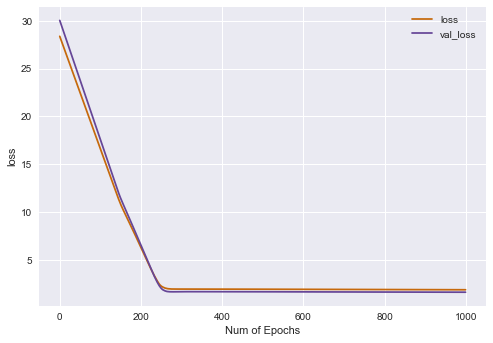

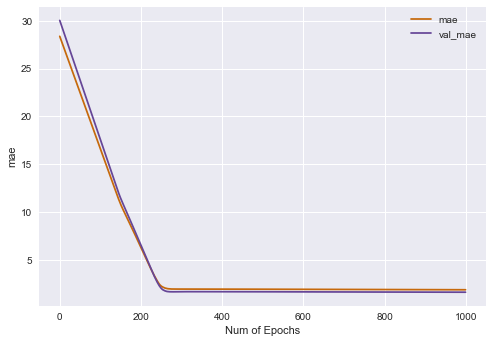

In [34]:
# string --> loss , mae, mse

def plotGraphs(history, string): 
  plt.plot(history.history[string])
  plt.plot(history.history[f'val_{string}'])
  plt.xlabel('Num of Epochs')
  plt.ylabel(string)
  plt.legend([string, f'val_{string}'])
  plt.show()

plotGraphs(history, 'loss')
plotGraphs(history, 'mae')

In [35]:
testPreds = model.predict(testFeatures).flatten() #array of all prediction values

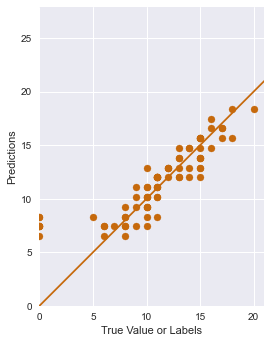

In [36]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.plot([-100, 100], [-100,100])
  plt.show()

predPlot(testLabels, testPreds)

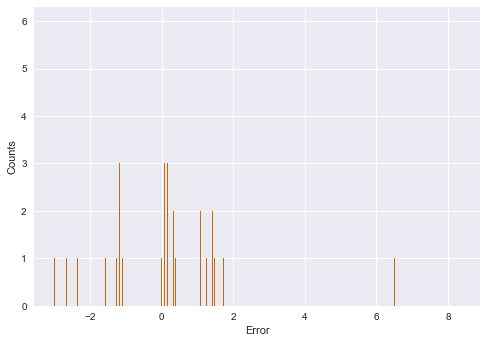

In [37]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)